In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

/var/folders/v1/8d8xn8d954g4r5ckr7569kdh0000gn/T/ipykernel_50037/3684037385.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [152]:
raw = yf.download("AAPL","2015-01-01","2019-12-31").Close.to_frame()

[*********************100%***********************]  1 of 1 completed


In [169]:
raw.rename(columns={"Close":"price"},inplace=True)

## Create a class

In [228]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        """
        dataframe = FinancialInstrument("AAPL","2015-01-01","2019-12-31")
        """
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return (f"FinancialInstrument(ticker={self._ticker}, "
                f"start={self.start}, end={self.end})")
    
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace=True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    ### For plot
    def plot_prices(self):
        self.data["price"].plot(figsize=(10,7))
        plt.title(f"Price Chart: {self._ticker}", fontsize=15)
    
    def plot_returns(self, kind="ts"):
        if kind=="ts":
            self.data["log_returns"].plot(figsize=(10,7))
            plt.title(f"Returns: {self._ticker}",fontsize=15)
        elif kind =="hist":
            self.data["log_returns"].hist(figsize=(10,7), bins=int(np.sqrt(len(self.data))))
            plt.title(f"Frequency of Returns: {self._ticker}",fontsize=15)
    
    ### Set new dataframe
    def set_ticker(self, ticker=None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq=None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data["price"].resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
        
    def std_returns(self, freq=None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data["price"].resample(freq).last()
            resampled_returns = np.log(resampled_price/resampled_price.shift(1))
            return resampled_returns.std()
        
    def annulized_perf(self):
        """
        Calculate the return and risk
        """
        mean_return = round(self.data["log_returns"].mean()*252,3)
        risk = round(self.data.log_returns.std()* np.sqrt(252),3)
        print(f"Return: {mean_return}| Risk: {risk}")
                      
    

In [229]:
test = FinancialInstrument("AAPL","2015-01-01","2019-12-31")
test

[*********************100%***********************]  1 of 1 completed


FinancialInstrument(ticker=AAPL,start=2015-01-01, end=2019-12-31)

In [198]:
test.data

,price
Date,
2014-12-31,27.594999
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


In [199]:
test.log_returns()

In [200]:
test.data.head()

,price,log_returns
Date,,
2014-12-31,27.594999,NaN
2015-01-02,27.332500,-0.009558
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925


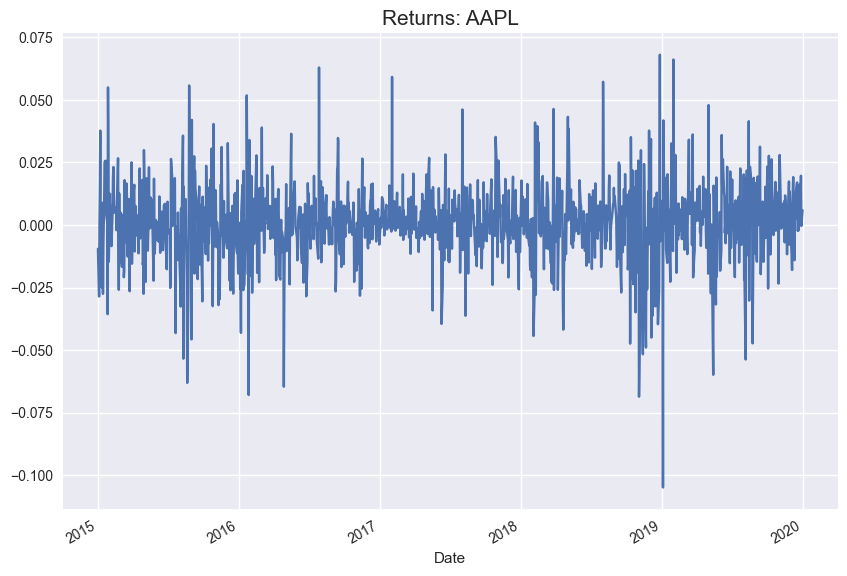

In [201]:
test.plot_returns()

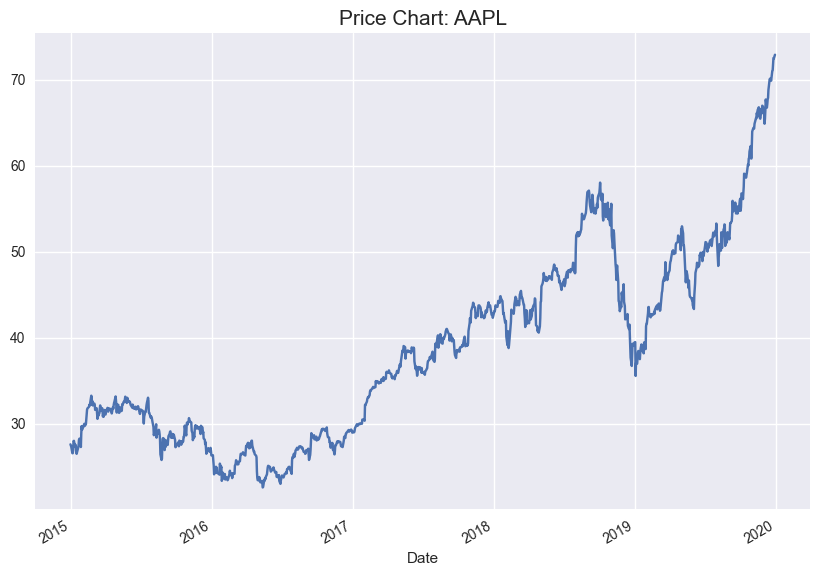

In [202]:
test.plot_prices()

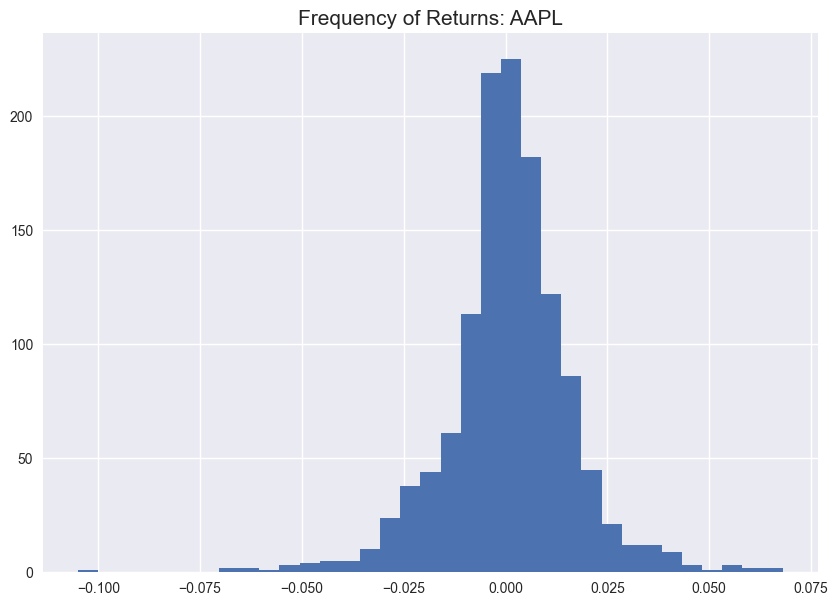

In [203]:
test.plot_returns(kind="hist")

In [204]:
test._ticker

'AAPL'

In [205]:
test.set_ticker("GE")

[*********************100%***********************]  1 of 1 completed


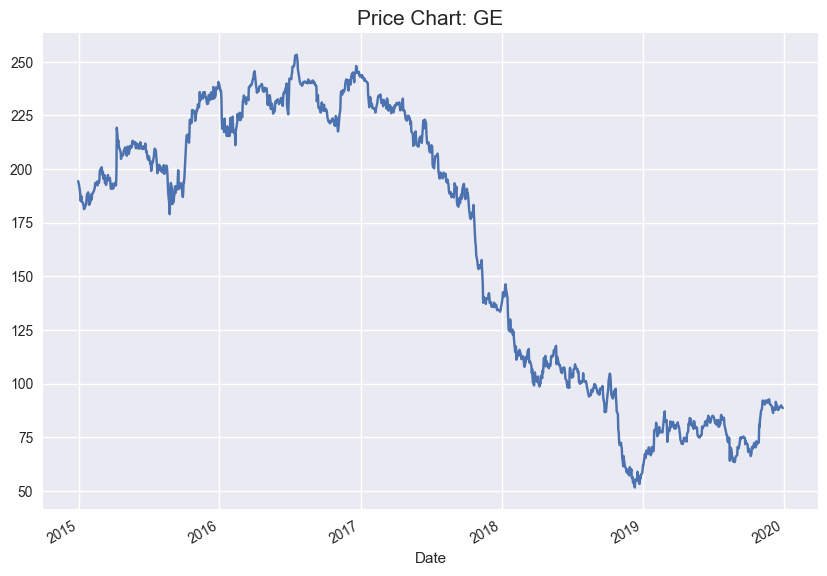

In [206]:
test.plot_prices()

## Create new instance for test

In [217]:
apple_stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")
apple_stock.data.head()

[*********************100%***********************]  1 of 1 completed


,price,log_returns
Date,,
2014-12-31,27.594999,NaN
2015-01-02,27.332500,-0.009558
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925


In [218]:
apple_stock.mean_return()

0.0007726170590746605

In [219]:
apple_stock.mean_return("m")

0.016186327387614077

In [220]:
apple_stock.std_returns()

0.015689387907553656

In [221]:
apple_stock.std_returns("m")

0.07580755091946953

## Create inheritance class

In [ ]:
class RiskReturn(FinancialInstrumentBase):
    def mean_returnself, fre